In [ ]:
import matplotlib.pyplot as plt
import math 
import csv

In [2]:
def interpolate(Pi, Ti, H, Hi, Fi):
    g = 9.8063*(1-(10**-7)*((Hi+H)/2)*(1-0.0026373*math.cos(2*Fi)+5.9*(10**-6)*(math.cos(2*Fi)**2)))
    p = Pi * ((Ti - 0.0065*(H-Hi))/Ti)**((g*0.289644)/(8.31432* 0.0065))

    return str(p)

In [3]:
def calculate_ztd(file_name):
    ztd_array = []

    with open(file_name, newline='') as csvfile:
            reader = csv.reader(csvfile)
            
            for row in reader:
                if (row[2] == "BOGI"):
                    if (row[3]=="2m"):
                        row[12] = interpolate(float(row[12]), float(row[10]), float(row[8]), float(row[9]), float(row[4]))

                    e_sat = 6.112*math.exp((17.67*(float(row[10])-273.15))/((float(row[10])-273.15)+243.5))
                    ztd = 0.002277*(float(row[12])+((1255/float(row[10]))+0.05)*(float(row[11])*e_sat/100))
                    ztd_array.append(ztd)
            return ztd_array
                    

In [4]:
z1 = calculate_ztd('media/surface_20150912_00.csv')
z2 = calculate_ztd('media/surface_20150912_06.csv')
z3 = calculate_ztd('media/surface_20150912_12.csv')
z4 = calculate_ztd('media/surface_20150912_18.csv')
z5 = calculate_ztd('media/surface_20150913_00.csv')
z6 = calculate_ztd('media/surface_20150913_06.csv')
z7 = calculate_ztd('media/surface_20150913_12.csv')
z8 = calculate_ztd('media/surface_20150913_18.csv')

In [5]:
average_ztd = []

for j in range(0,6):
    average_ztd.append((z1[j]*(1/(j+2)))/(1/(j+2)))

for j in range(0,6):
    average_ztd.append((z1[j+6]*(1/(j+8))+z2[j]*(1/(j+2)))/((1/(j+8))+(1/(j+2))))

for j in range(0,6):
    average_ztd.append((z1[j+12]*(1/(j+14))+z2[j+6]*(1/(j+8))+z3[j]*(1/(j+2)))/((1/(j+14))+(1/(j+8))+(1/(j+2))))

for j in range(0,6):
    average_ztd.append((z1[j+18]*(1/(j+20))+z2[j+12]*(1/(j+14))+z3[j+6]*(1/(j+8))+z4[j]*(1/(j+2)))/((1/(j+20))+(1/(j+14))+(1/(j+8))+(1/(j+2))))

for j in range(0,6):
    average_ztd.append((z2[j+18]*(1/(j+20))+z3[j+12]*(1/(j+14))+z4[j+6]*(1/(j+8))+z5[j]*(1/(j+2)))/((1/(j+20))+(1/(j+14))+(1/(j+8))+(1/(j+2))))

for j in range(0,6):
    average_ztd.append((z3[j+18]*(1/(j+20))+z4[j+12]*(1/(j+14))+z5[j+6]*(1/(j+8))+z6[j]*(1/(j+2)))/((1/(j+20))+(1/(j+14))+(1/(j+8))+(1/(j+2))))

for j in range(0,6):
    average_ztd.append((z4[j+18]*(1/(j+20))+z5[j+12]*(1/(j+14))+z6[j+6]*(1/(j+8))+z7[j]*(1/(j+2)))/((1/(j+20))+(1/(j+14))+(1/(j+8))+(1/(j+2))))

for j in range(0,6):
    average_ztd.append((z5[j+18]*(1/(j+20))+z6[j+12]*(1/(j+14))+z7[j+6]*(1/(j+8))+z8[j]*(1/(j+2)))/((1/(j+20))+(1/(j+14))+(1/(j+8))+(1/(j+2))))

for j in range(0,6):
    average_ztd.append((z6[j+18]*(1/(j+14))+z7[j+12]*(1/(j+8))+z8[j+6]*(1/(j+2)))/((1/(j+14))+(1/(j+8))+(1/(j+2))))    

for j in range(0,6):
    average_ztd.append((z7[j+18]*(1/(j+8))+z8[j+12]*(1/(j+2)))/((1/(j+8))+(1/(j+2))))

for j in range(0,6):
    average_ztd.append(z8[j+18])    

In [6]:
x1 = range(0,24)
x2 = range(6,30)
x3 = range(12,36)
x4 = range(18,42)
x5 = range(24,48)
x6 = range(30,54)
x7 = range(36,60)
x8 = range(42,66)

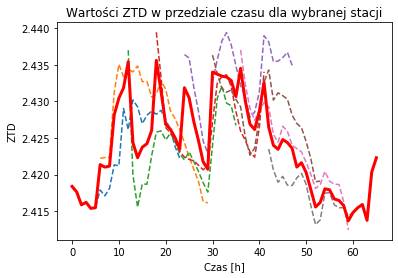

In [7]:
plt.title('Wartości ZTD w przedziale czasu dla wybranej stacji')
plt.ylabel('ZTD')
plt.xlabel('Czas [h]')
plt.plot(x1, z1, '--')
plt.plot(x2, z2, '--')
plt.plot(x3, z3, '--')
plt.plot(x4, z4, '--')
plt.plot(x5, z5, '--')
plt.plot(x6, z6, '--')
plt.plot(x7, z7, '--')
plt.plot(x8, z8, '--')
plt.plot(average_ztd, linewidth=3.0, color='red')
plt.show()